# Reading and plotting data from WRF-PartMC netCDF file

In [1]:
import numpy as np
from netCDF4 import Dataset
import cartopy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import wrf


In [2]:
def apply_map_features(axes):
    ''' Adds map features '''
    axes.coastlines(resolution='50m', color='black', linewidth=1)
    states_provinces = cartopy.feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    axes.add_feature(states_provinces, edgecolor='black')
    
    return

In [3]:
# Load netcdf file
data_dir = '/home/jcurtis2/hackathon_data/'
wrf_filename = '%straining.nc' % data_dir
ncf = Dataset(wrf_filename, "r", format="NETCDF4")

In [4]:
# WRF map projection
cart_proj = cartopy.crs.LambertConformal(central_longitude=-97,central_latitude=38)
# Data projection
data_proj = cartopy.crs.PlateCarree()

In [5]:
# Static data
lats = ncf.variables['XLAT'][0,:,:]
lons = ncf.variables['XLONG'][0,:,:]

In [6]:
i_time = -1 # Scecify output time to plot
i_z = 0 # Specify level to plot

### Plot ozone mixing ratio

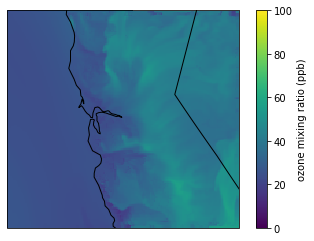

In [7]:
fig = plt.figure()
axes = fig.add_subplot(projection=cart_proj)
data = ncf.variables['o3']

norm = colors.Normalize(0,100)
c = axes.pcolormesh(lons,lats,data[i_time,i_z,:,:],
                       norm=norm,transform=data_proj)

apply_map_features(axes)
cbar = fig.colorbar(c)
cbar.set_label('ozone mixing ratio (ppb)')
fig.savefig('example_gas.pdf');

### Plot aerosol number concentration

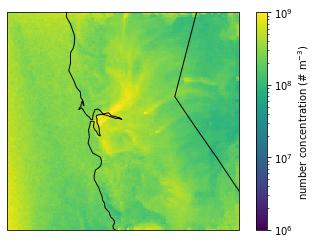

In [8]:
fig = plt.figure()
axes = fig.add_subplot(projection=cart_proj)
data = ncf.variables['TOT_NUM_CONC'][:]

norm = colors.LogNorm(1e6,1e9)
c = axes.pcolormesh(lons,lats,data[i_time,i_z,:,:],
                       norm=norm,transform=data_proj)

apply_map_features(axes)
cbar = fig.colorbar(c)
cbar.set_label('number concentration (# m$^{-3}$)')
fig.savefig('example_aerosols.pdf');

### Selecting range of data

It will be necessary to exclude some of the data from the dataset. In particular, removing horizontal boundary conditions (domain edges).

In [9]:
(nt,nz,ny,nx) = data.shape
print(nt,nz,ny,nx)

x_s = 1
x_e = nx-1
y_s = 1
y_e = ny-1
z_s = 0
z_e = nz
t_s = 0
t_e = nt
print(data[t_s:t_e,z_s:z_e,y_s:y_e,x_s:x_e].shape)

133 39 159 169
(133, 39, 157, 167)


In [10]:
ncf.close() # Close netcdf file